<a href="https://colab.research.google.com/github/bishwajit02/Pytorch-Tutorial-Youtube/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Neural Network using Iris Dataset**

In [63]:
import torch
import torch.nn as nn # nn stands for neural network
import torch.nn.functional as F
import numpy as np


In [64]:
# Create a model class that inherits nn.Module

class Model(nn.Module):
  # Input Layers (4 features)
  # --> Then to hidden layers --> Output (3 classes of Iris flower)

# The 'def __init__' function sets up the class
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()  # Instantiate the model
    self.fc1 = nn.Linear(in_features, h1)   #fc - Fully Connected (Important for Neural Network)
    self.fc2 = nn.Linear(h1, h2)  # The previous result h1 is now connected with the new layer h2
    self.out = nn.Linear(h2, out_features)  # h2 is the last layer so it's directly connected to the output

  def forward(self, x):
    x = F.relu(self.fc1(x))  # relu - Rectified Linear Unit, More - https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU,
    # If the input is positive (greater than zero): ReLU lets the input pass through unchanged.
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [65]:
# Pick a manual seed for randomization - helps with reproductibility
torch.manual_seed(42)

# Create an instance for the model

model = Model()

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [68]:
df.tail()
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [69]:
# Changing last column to number

df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

<ipython-input-69-4f23bf7e11d6>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


In [70]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [71]:
# Set X and y

X = df.drop('variety', axis=1)
y = df['variety']

In [72]:
# Convert this into numpy arrays

X = X.values
y = y.values



In [73]:
# Need SciKitLearn to perform Train-Test-Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size = 0.2 means 20% of total data will be used to test the model, the rest 80% is for training the model

In [74]:
# Converting the variables into tensors

# FloatTensor means decimal number (32 bits)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# LongTensor means integer number (64 btis)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [75]:
# Setting up the criterion | How far off the predictions are from the data

# CrossEntropyLoss is a way to measure how bad our computer's guess (the predicted probabilities) is compared to the real answer (the true label)
criterion = nn.CrossEntropyLoss()

# Choose an Optimizer, learning rate
# If the error doesn't go down after a bunch of iteration (epochs), lower the learning rate (lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [84]:
# Training the model
# Epochs = one complete pass through your entire training dataset during the training process

epochs = 300
losses = []

for i in range(epochs):
  # Go forward and give a prediction
  y_pred = model.forward(X_train)  # Get predicted data by passing it through the training data

  # Measure the loss
  loss = criterion(y_pred, y_train)

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and Loss: {loss}')

  # Back propagation: Take the error rate of the forward propagation and feed it back to reduce the error rate and fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 0.05315251648426056
Epoch: 10 and Loss: 0.053086232393980026
Epoch: 20 and Loss: 0.05302058160305023
Epoch: 30 and Loss: 0.052955515682697296
Epoch: 40 and Loss: 0.05289101228117943
Epoch: 50 and Loss: 0.05282707139849663
Epoch: 60 and Loss: 0.052763745188713074
Epoch: 70 and Loss: 0.0527009591460228
Epoch: 80 and Loss: 0.0526387058198452
Epoch: 90 and Loss: 0.052577000111341476
Epoch: 100 and Loss: 0.05251579359173775
Epoch: 110 and Loss: 0.05245506018400192
Epoch: 120 and Loss: 0.052394840866327286
Epoch: 130 and Loss: 0.052335143089294434
Epoch: 140 and Loss: 0.0522758923470974
Epoch: 150 and Loss: 0.052217114716768265
Epoch: 160 and Loss: 0.052158791571855545
Epoch: 170 and Loss: 0.05210091546177864
Epoch: 180 and Loss: 0.052043404430150986
Epoch: 190 and Loss: 0.05198641121387482
Epoch: 200 and Loss: 0.05192982032895088
Epoch: 210 and Loss: 0.051873620599508286
Epoch: 220 and Loss: 0.051817797124385834
Epoch: 230 and Loss: 0.0517624095082283
Epoch: 240 and Loss:

Text(0.5, 0, 'Iteration')

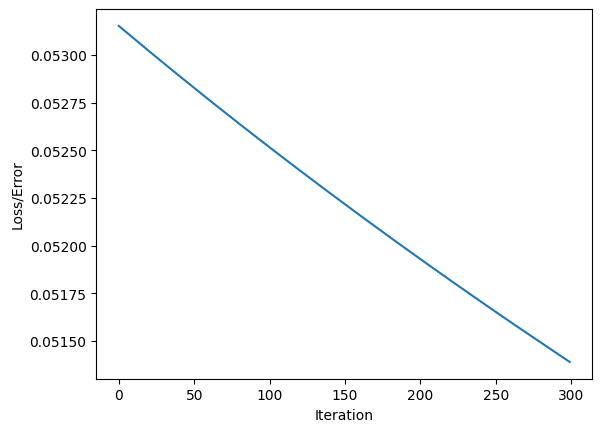

In [85]:
# Graph the thing

plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Iteration")